In [1]:
import os
import sys
import pandas as pd

operating_system = 'curnagl'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

# Add the path to the custom library
custom_library_path = os.path.abspath('util/processing/')
sys.path.append(custom_library_path)

import extraction_squares

name_of_variable= pd.read_csv('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/curnagl/DATASETS/variable_list_80_mean.csv')
storm_dates = pd.read_csv('pre_processing/tracks/storm_dates.csv')
path_data = '/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/curnagl/DATASETS'
path_tracks_1h_EU = 'pre_processing/tracks/ALL_TRACKS/tracks_1h_EU'
path_tracks_1h_non_EU = 'pre_processing/tracks/ALL_TRACKS/tracks_1h_non_EU'
dataset = 'datasets_1h_EU'
dataset_non_EU = 'datasets_1h_non_EU'
#name_of_variables, storm_dates, path_data, path_tracks_1h_EU, dataset

In [2]:
X_train, X_test, X_validation, y_train, y_test, y_validation = extraction_squares.X_y_datasets_EU(name_of_variable, storm_dates, path_data, path_tracks_1h_EU, dataset, False)

Storm 59 not found in 10m_u_component_of_wind for level 0
Storm 59 not found in 10m_u_component_of_wind for level 0
Storm 59 not found in 10m_u_component_of_wind for level 0
Storm 59 not found in 10m_u_component_of_wind for level 0
Storm 59 not found in 10m_v_component_of_wind for level 0
Storm 59 not found in 10m_v_component_of_wind for level 0
Storm 59 not found in 10m_v_component_of_wind for level 0
Storm 59 not found in 10m_v_component_of_wind for level 0
Storm 59 not found in 2m_dewpoint_temperature for level 0
Storm 59 not found in 2m_dewpoint_temperature for level 0
Storm 59 not found in 2m_dewpoint_temperature for level 0
Storm 59 not found in 2m_dewpoint_temperature for level 0
Storm 59 not found in 2m_temperature for level 0
Storm 59 not found in 2m_temperature for level 0
Storm 59 not found in 2m_temperature for level 0
Storm 59 not found in 2m_temperature for level 0
Storm 59 not found in convective_available_potential_energy for level 0
Storm 59 not found in convective_ava

In [3]:
X_train, X_test, X_validation, y_train, y_test, y_validation, y_all_3d, last_step = extraction_squares.X_y_datasets_non_EU(name_of_variable, storm_dates, path_data, path_tracks_1h_non_EU, dataset_non_EU, False)

Storm 24 not found in 10m_u_component_of_wind for level 0
Storm 24 not found in 10m_u_component_of_wind for level 0
Storm 24 not found in 10m_u_component_of_wind for level 0
Storm 24 not found in 10m_u_component_of_wind for level 0
Storm 24 not found in 10m_v_component_of_wind for level 0
Storm 24 not found in 10m_v_component_of_wind for level 0
Storm 24 not found in 10m_v_component_of_wind for level 0
Storm 24 not found in 10m_v_component_of_wind for level 0
Storm 24 not found in 2m_dewpoint_temperature for level 0
Storm 24 not found in 2m_dewpoint_temperature for level 0
Storm 24 not found in 2m_dewpoint_temperature for level 0
Storm 24 not found in 2m_dewpoint_temperature for level 0
Storm 24 not found in 2m_temperature for level 0
Storm 24 not found in 2m_temperature for level 0
Storm 24 not found in 2m_temperature for level 0
Storm 24 not found in 2m_temperature for level 0
Storm 24 not found in convective_available_potential_energy for level 0
Storm 24 not found in convective_ava

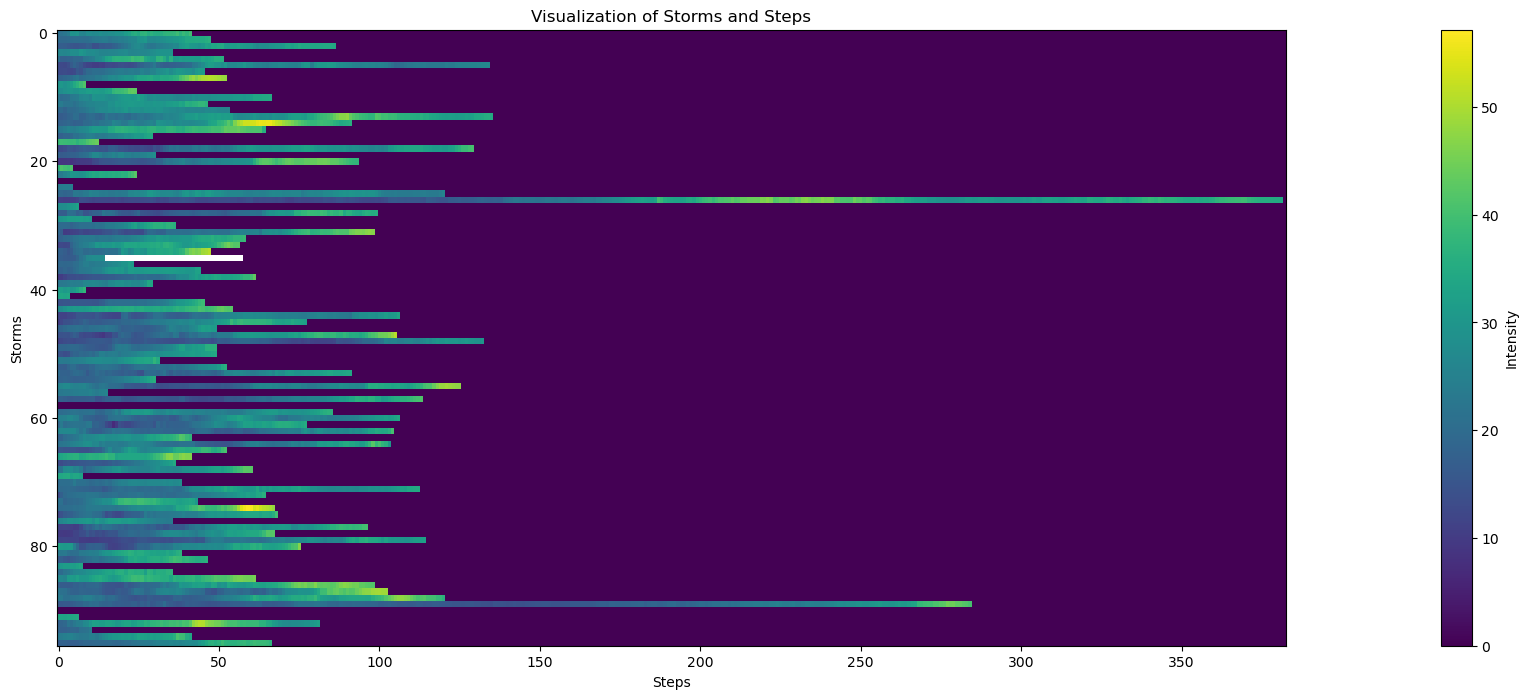

In [4]:
import matplotlib.pyplot as plt
import numpy as np

y_all_3d_mean = y_all_3d[:,:,0]
selected_data = [y_all_3d_mean[i, :last_step[i]] for i in range(len(last_step))]

# transform the selected data into a 2D array
selected_data_array =np.zeros((len(selected_data), max(last_step)+1))
for i in range(len(selected_data)):
    selected_data_array[i, :last_step[i]] = selected_data[i]



# plot the wind speed

plt.figure(figsize=(40, 8))
plt.imshow(selected_data_array, aspect=2, cmap='viridis')  # Use 'aspect="auto"' to adjust the display
plt.colorbar(label='Intensity')  # Add a colorbar to interpret values
plt.title('Visualization of Storms and Steps')
plt.xlabel('Steps')
plt.ylabel('Storms')
plt.show()